In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('iris.csv')

In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
df.shape


(150, 5)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
df['species'] = df['species'].map({'versicolor':0, 'setosa':1, 'virginica':2})

In [9]:
df['species']

0      2
1      2
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    2
149    2
Name: species, Length: 150, dtype: int64

In [10]:
df['species'].unique()

array([2, 0, 1])

In [12]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,3.1,5.5,1.8,2
1,6.1,3.0,4.9,1.8,2
2,5.5,2.4,3.8,1.1,0
3,6.3,3.3,4.7,1.6,0
4,5.6,3.0,4.5,1.5,0
5,6.5,3.0,5.8,2.2,2
6,7.2,3.2,6.0,1.8,2
7,4.9,3.1,1.5,0.1,1
8,5.8,2.6,4.0,1.2,0
9,5.8,2.7,4.1,1.0,0


In [13]:
X = df.drop(columns='species')
y = df.species

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.4,3.1,5.5,1.8
1,6.1,3.0,4.9,1.8
2,5.5,2.4,3.8,1.1
3,6.3,3.3,4.7,1.6
4,5.6,3.0,4.5,1.5


In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(4,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
EPOCHS = 300
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=2, epochs=EPOCHS, callbacks=[callback])

Epoch 1/300
4/4 - 0s - loss: 1.1276 - accuracy: 0.3250 - val_loss: 0.9910 - val_accuracy: 0.4000
Epoch 2/300
4/4 - 0s - loss: 1.0034 - accuracy: 0.4250 - val_loss: 0.9047 - val_accuracy: 0.5667
Epoch 3/300
4/4 - 0s - loss: 0.9165 - accuracy: 0.6250 - val_loss: 0.8473 - val_accuracy: 0.7000
Epoch 4/300
4/4 - 0s - loss: 0.8575 - accuracy: 0.6500 - val_loss: 0.8099 - val_accuracy: 0.7000
Epoch 5/300
4/4 - 0s - loss: 0.8165 - accuracy: 0.6583 - val_loss: 0.7811 - val_accuracy: 0.7000
Epoch 6/300
4/4 - 0s - loss: 0.7840 - accuracy: 0.7167 - val_loss: 0.7545 - val_accuracy: 0.8333
Epoch 7/300
4/4 - 0s - loss: 0.7521 - accuracy: 0.8167 - val_loss: 0.7282 - val_accuracy: 0.8333
Epoch 8/300
4/4 - 0s - loss: 0.7256 - accuracy: 0.8167 - val_loss: 0.7022 - val_accuracy: 0.8000
Epoch 9/300
4/4 - 0s - loss: 0.7003 - accuracy: 0.7833 - val_loss: 0.6760 - val_accuracy: 0.8000
Epoch 10/300
4/4 - 0s - loss: 0.6744 - accuracy: 0.8000 - val_loss: 0.6480 - val_accuracy: 0.8667
Epoch 11/300
4/4 - 0s - loss:

Epoch 85/300
4/4 - 0s - loss: 0.0920 - accuracy: 0.9833 - val_loss: 0.1127 - val_accuracy: 0.9667
Epoch 86/300
4/4 - 0s - loss: 0.0873 - accuracy: 0.9833 - val_loss: 0.1200 - val_accuracy: 0.9000
Epoch 87/300
4/4 - 0s - loss: 0.0873 - accuracy: 0.9917 - val_loss: 0.1232 - val_accuracy: 0.9000
Epoch 88/300
4/4 - 0s - loss: 0.0894 - accuracy: 0.9833 - val_loss: 0.1117 - val_accuracy: 0.9667
Epoch 89/300
4/4 - 0s - loss: 0.0855 - accuracy: 0.9833 - val_loss: 0.1157 - val_accuracy: 0.9000
Epoch 90/300
4/4 - 0s - loss: 0.0880 - accuracy: 0.9833 - val_loss: 0.1239 - val_accuracy: 0.9000
Epoch 91/300
4/4 - 0s - loss: 0.0908 - accuracy: 0.9833 - val_loss: 0.1114 - val_accuracy: 0.9667
Epoch 92/300
4/4 - 0s - loss: 0.0823 - accuracy: 0.9833 - val_loss: 0.1161 - val_accuracy: 0.9000
Epoch 93/300
4/4 - 0s - loss: 0.0839 - accuracy: 0.9833 - val_loss: 0.1214 - val_accuracy: 0.9000
Epoch 94/300
4/4 - 0s - loss: 0.0827 - accuracy: 0.9833 - val_loss: 0.1095 - val_accuracy: 0.9667
Epoch 95/300
4/4 - 0

In [23]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([[2.0694875e-03, 9.9791414e-01, 1.6416747e-05],
       [2.0684881e-02, 6.9404905e-06, 9.7930819e-01],
       [1.3634370e-02, 1.5325973e-05, 9.8635036e-01],
       [6.0925990e-01, 4.5901144e-04, 3.9028111e-01],
       [9.8274833e-01, 2.1078405e-03, 1.5143908e-02],
       [3.9874609e-03, 9.9597061e-01, 4.1864536e-05],
       [2.6331887e-01, 1.4250951e-04, 7.3653865e-01],
       [3.1154803e-03, 9.9685246e-01, 3.2124590e-05],
       [2.2502155e-03, 9.9773186e-01, 1.8003921e-05],
       [1.8519062e-03, 1.4496143e-06, 9.9814665e-01],
       [2.2360658e-02, 8.4631620e-06, 9.7763091e-01],
       [9.7955589e-04, 9.9901593e-01, 4.5329848e-06],
       [9.8759949e-01, 2.0015470e-03, 1.0398927e-02],
       [9.9047089e-01, 3.2880406e-03, 6.2411162e-03],
       [9.7716922e-01, 5.6317374e-03, 1.7199023e-02],
       [2.9003285e-03, 9.9707079e-01, 2.8873477e-05],
       [2.4242387e-03, 9.9755400e-01, 2.1747050e-05],
       [2.6864238e-02, 1.3282517e-05, 9.7312254e-01],
       [4.6241816e-04, 1.356

In [28]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,5.1,3.8,1.6,0.2
18,6.9,3.2,5.7,2.3
118,5.6,2.8,4.9,2.0
78,6.3,2.8,5.1,1.5
76,5.6,3.0,4.1,1.3
31,5.0,3.0,1.6,0.2
64,6.9,3.1,5.1,2.3
141,4.6,3.6,1.0,0.2
68,5.4,3.4,1.5,0.4
82,5.8,2.8,5.1,2.4


In [27]:
predictions

[1,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0]

In [24]:
predictions = [np.argmax(i) for i in y_pred]

In [25]:
y_pred.shape

(30, 3)

In [26]:
pd.DataFrame({'original': y_test, 'predictions': predictions})

,original,predictions
73,1,1
18,2,2
118,2,2
78,2,0
76,0,0
31,1,1
64,2,2
141,1,1
68,1,1
82,2,2


Text(0.5, 0, 'EPOCHS')

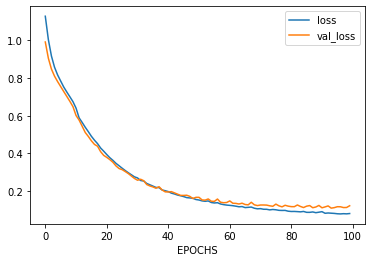

In [30]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.xlabel('EPOCHS')